In [21]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

stock_symbol = 'AAPL'
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 1, 1)

stock_data = web.DataReader(stock_symbol, 'stooq', start_date, end_date)
stock_data_chron = stock_data[::-1]
stock_data_chron['Daily_Mean_Price'] = (stock_data_chron['High'] + stock_data_chron['Low']) / 2

<ipython-input-21-6c099ab6e87b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_chron['Daily_Mean_Price'] = (stock_data_chron['High'] + stock_data_chron['Low']) / 2


In [22]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-31,177.060,178.196,176.233,176.541,6.443406e+07
2021-12-30,178.436,179.532,177.060,177.169,6.011992e+07
2021-12-29,178.296,179.592,177.110,178.346,6.271079e+07
2021-12-28,179.124,180.280,177.499,178.256,7.960367e+07
2021-12-27,176.063,179.382,176.043,179.294,7.535440e+07


In [23]:
stock_data_chron.head()

,Open,High,Low,Close,Volume,Daily_Mean_Price
Date,,,,,,
2017-01-03,27.0924,27.2199,26.8422,27.1761,1.185667e+08,27.03105
2017-01-04,27.1053,27.2629,27.0824,27.1462,8.770854e+07,27.17265
2017-01-05,27.1223,27.3426,27.0954,27.2867,9.273204e+07,27.21900
2017-01-06,27.3247,27.6476,27.2529,27.5858,1.321675e+08,27.45025
2017-01-09,27.5948,27.9457,27.5918,27.8381,1.352219e+08,27.76875


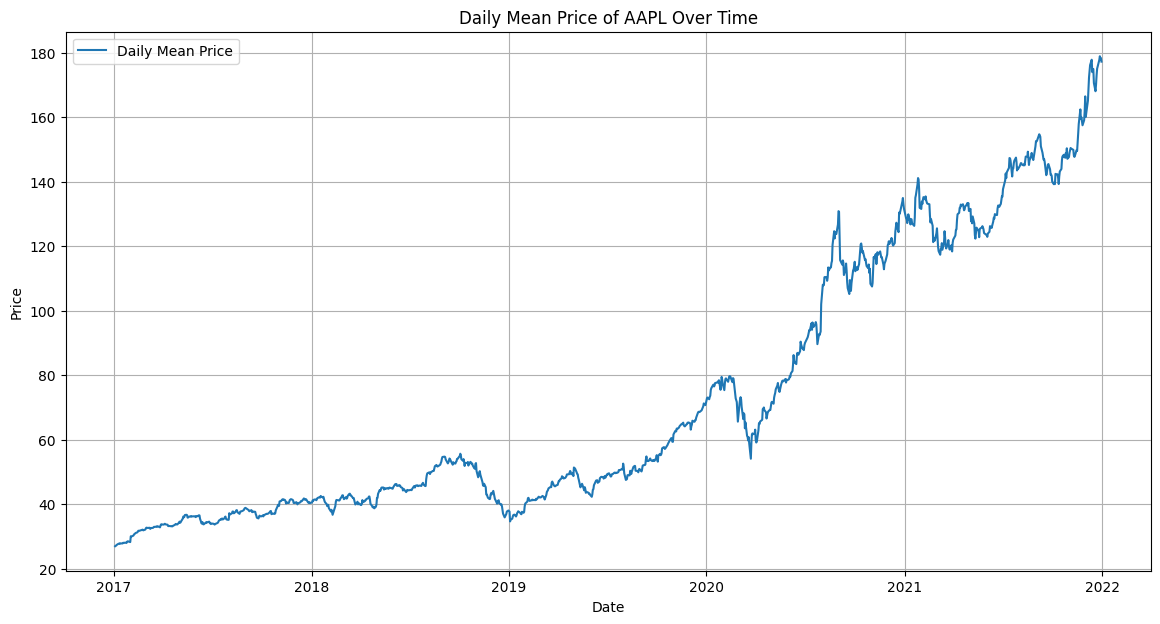

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(stock_data_chron.index, stock_data_chron['Daily_Mean_Price'], label='Daily Mean Price')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
p = 7

for i in range(1, p+1):
  stock_data_chron[f'Mean_Price_D-{i}'] = stock_data_chron['Daily_Mean_Price'].shift(i)

stock_data_chron[:p+1]

<ipython-input-15-d1a2c599b66d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_chron[f'Mean_Price_D-{i}'] = stock_data_chron['Daily_Mean_Price'].shift(i)
<ipython-input-15-d1a2c599b66d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_chron[f'Mean_Price_D-{i}'] = stock_data_chron['Daily_Mean_Price'].shift(i)
<ipython-input-15-d1a2c599b66d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Open,High,Low,Close,Volume,Daily_Mean_Price,Mean_Price-D-1,Mean_Price-D-2,Mean_Price-D-3,Mean_Price-D-4,Mean_Price-D-5,Mean_Price-D-6,Mean_Price-D-7,Mean_Price_D-1,Mean_Price_D-2,Mean_Price_D-3,Mean_Price_D-4,Mean_Price_D-5,Mean_Price_D-6,Mean_Price_D-7
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,27.0924,27.2199,26.8422,27.1761,1.185667e+08,27.03105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,27.1053,27.2629,27.0824,27.1462,8.770854e+07,27.17265,27.03105,NaN,NaN,NaN,NaN,NaN,NaN,27.03105,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,27.1223,27.3426,27.0954,27.2867,9.273204e+07,27.21900,27.17265,27.03105,NaN,NaN,NaN,NaN,NaN,27.17265,27.03105,NaN,NaN,NaN,NaN,NaN
2017-01-06,27.3247,27.6476,27.2529,27.5858,1.321675e+08,27.45025,27.21900,27.17265,27.03105,NaN,NaN,NaN,NaN,27.21900,27.17265,27.03105,NaN,NaN,NaN,NaN
2017-01-09,27.5948,27.9457,27.5918,27.8381,1.352219e+08,27.76875,27.45025,27.21900,27.17265,27.03105,NaN,NaN,NaN,27.45025,27.21900,27.17265,27.03105,NaN,NaN,NaN
2017-01-10,27.7862,27.9338,27.6796,27.8680,9.055044e+07,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105,NaN,NaN,27.76875,27.45025,27.21900,27.17265,27.03105,NaN,NaN
2017-01-11,27.7783,28.0575,27.7474,28.0175,1.130372e+08,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105,NaN,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105,NaN
2017-01-12,27.8142,27.9139,27.6576,27.9039,1.139938e+08,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105


In [16]:
stock_data_chron_nona = stock_data_chron.dropna()
stock_data_chron_nona.head()

,Open,High,Low,Close,Volume,Daily_Mean_Price,Mean_Price-D-1,Mean_Price-D-2,Mean_Price-D-3,Mean_Price-D-4,Mean_Price-D-5,Mean_Price-D-6,Mean_Price-D-7,Mean_Price_D-1,Mean_Price_D-2,Mean_Price_D-3,Mean_Price_D-4,Mean_Price_D-5,Mean_Price_D-6,Mean_Price_D-7
Date,,,,,,,,,,,,,,,,,,,,
2017-01-12,27.8142,27.9139,27.6576,27.9039,1.139938e+08,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105
2017-01-13,27.8680,27.9877,27.7962,27.8510,1.085474e+08,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265
2017-01-17,27.6896,28.1302,27.6596,28.0753,1.364514e+08,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900
2017-01-18,28.0753,28.1900,28.0075,28.0733,9.649904e+07,28.09875,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025
2017-01-19,27.9378,28.0973,27.9308,28.0255,1.019094e+08,28.01405,28.09875,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875,28.09875,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875


In [18]:
features = [f'Mean_Price_D-{i}' for i in range(1, p+1)]
X_train = stock_data_chron_nona[features]
y_train = stock_data_chron_nona['Daily_Mean_Price']

In [19]:
X_train.head()

,Mean_Price_D-1,Mean_Price_D-2,Mean_Price_D-3,Mean_Price_D-4,Mean_Price_D-5,Mean_Price_D-6,Mean_Price_D-7
Date,,,,,,,
2017-01-12,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265,27.03105
2017-01-13,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900,27.17265
2017-01-17,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025,27.21900
2017-01-18,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875,27.45025
2017-01-19,28.09875,27.89490,27.89195,27.78575,27.90245,27.80670,27.76875


In [20]:
y_train.head()

Date
2017-01-12    27.78575
2017-01-13    27.89195
2017-01-17    27.89490
2017-01-18    28.09875
2017-01-19    28.01405
Name: Daily_Mean_Price, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression

model_AR = LinearRegression()
model_AR.fit(X_train, y_train)
print("Fitting results: ", "\nintercept =", model_AR.intercept_, '\nw =', model_AR.coef_)

Fitting results:  
intercept = 0.007055232437664927 
w = [ 1.16759175 -0.22972378  0.00968247  0.09326957 -0.01466405 -0.0825508
  0.05783556]


In [32]:
# Testing
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)
stock_test_data = web.DataReader(stock_symbol, 'stooq', start_date, end_date)

stock_test_data_chron = stock_test_data[::-1]
stock_test_data_chron['Daily_Mean_Price'] = (stock_test_data_chron['High'] + stock_test_data_chron['Low']) / 2

<ipython-input-32-09db2e969679>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_data_chron['Daily_Mean_Price'] = (stock_test_data_chron['High'] + stock_test_data_chron['Low']) / 2


In [33]:
stock_test_data_chron.head()

,Open,High,Low,Close,Volume,Daily_Mean_Price
Date,,,,,,
2022-01-03,176.801,181.825,176.681,180.958,1.053089e+08,179.2530
2022-01-04,181.576,181.885,178.087,178.665,9.988681e+07,179.9860
2022-01-05,178.576,179.134,173.630,173.910,9.508628e+07,176.3820
2022-01-06,171.636,174.289,170.650,171.008,9.746636e+07,172.4695
2022-01-07,171.896,173.132,170.041,171.178,8.721239e+07,171.5865


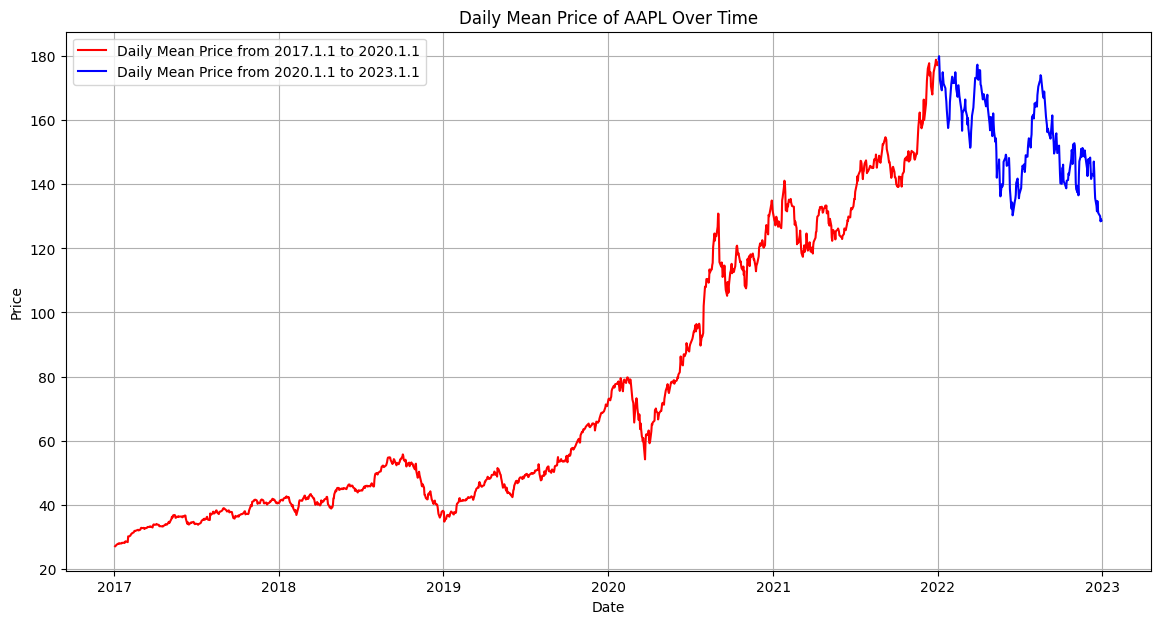

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data_chron.index, stock_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2017.1.1 to 2020.1.1', color='r')
plt.plot(stock_test_data_chron.index, stock_test_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2020.1.1 to 2023.1.1', color='b')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Create the shifted columns for the past k days' mean prices
for i in range(1, p + 1):
  stock_test_data_chron[f'Mean_Price_D-{i}'] = stock_test_data_chron['Daily_Mean_Price'].shift(i)

stock_test_data_chron_nona = stock_test_data_chron.dropna()
X_test = stock_test_data_chron_nona[features]
y_test = stock_test_data_chron_nona['Daily_Mean_Price']

<ipython-input-38-5aac9a3f3e5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_data_chron[f'Mean_Price_D-{i}'] = stock_test_data_chron['Daily_Mean_Price'].shift(i)
<ipython-input-38-5aac9a3f3e5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_test_data_chron[f'Mean_Price_D-{i}'] = stock_test_data_chron['Daily_Mean_Price'].shift(i)
<ipython-input-38-5aac9a3f3e5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

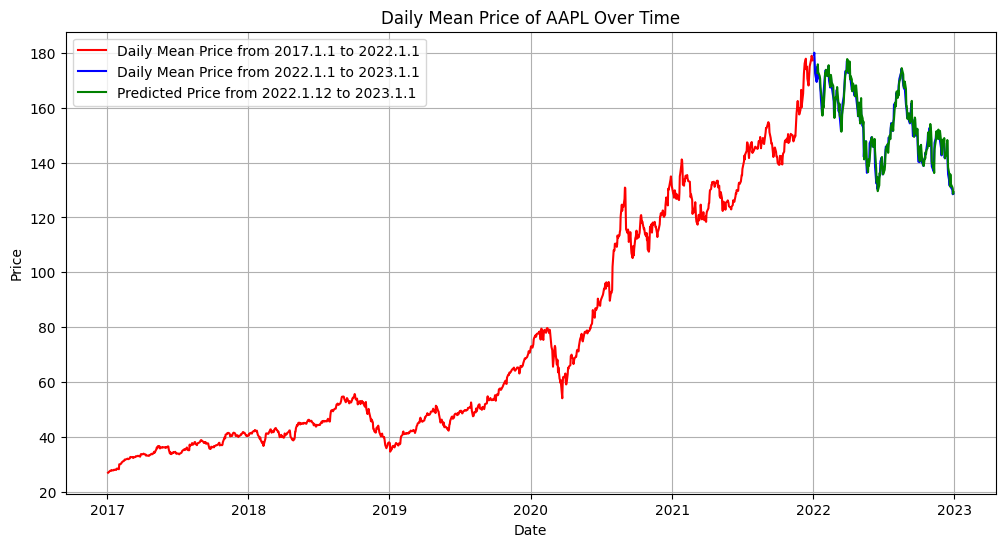

In [47]:
y_pred_AR = model_AR.predict(X_test)
plt.figure(figsize=(12,6))
plt.plot(stock_data_chron.index, stock_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2017.1.1 to 2022.1.1', color='r')
plt.plot(stock_test_data_chron.index, stock_test_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2022.1.1 to 2023.1.1', color='b')
plt.plot(y_test.index, y_pred_AR, label='Predicted Price from 2022.1.12 to 2023.1.1', color='g')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

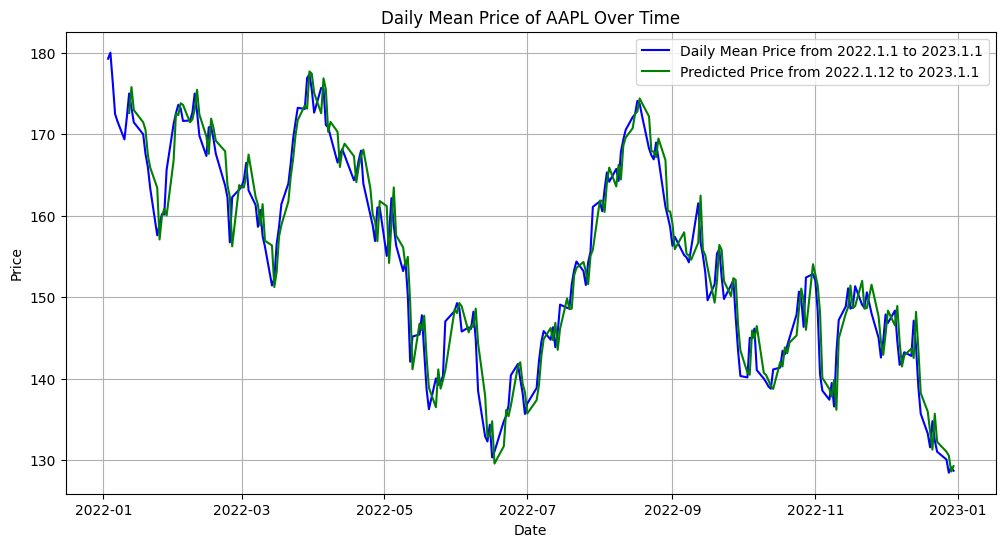

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(stock_test_data_chron.index, stock_test_data_chron['Daily_Mean_Price'], label='Daily Mean Price from 2022.1.1 to 2023.1.1', color='b')
plt.plot(y_test.index, y_pred_AR, label='Predicted Price from 2022.1.12 to 2023.1.1', color='g')
plt.title(f'Daily Mean Price of {stock_symbol} Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

1047.2879052435726


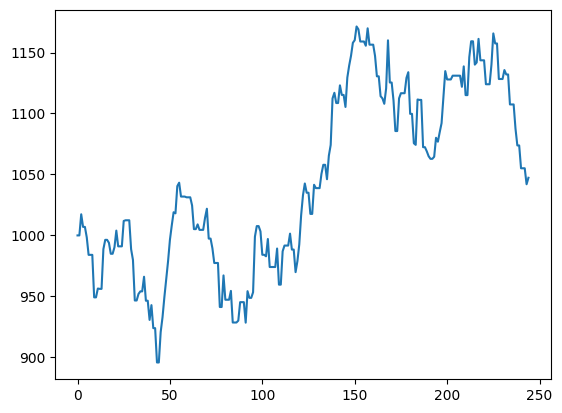

In [49]:
# Buy and Sell Stocks
# Suppose we start with an initial amount of $1000

initial_money = 1000
available_money = initial_money
stocks_owned = 0
previous_day_price = stock_test_data_chron['Daily_Mean_Price'][p-1]

capital_history = [initial_money]
n =1;

for predicted_price, actual_price in zip(y_pred_AR, stock_test_data_chron['Daily_Mean_Price'][p:]):
  if predicted_price > previous_day_price:
    # Buy stocks
    stocks_owned += (available_money/n) / previous_day_price
    available_money = available_money * (n-1) / n
  elif predicted_price < previous_day_price:
    # Sell stocks
    available_money += (stocks_owned/n) * previous_day_price
    stocks_owned = stocks_owned * (n-1) / n
  capital_history.append(available_money + stocks_owned*previous_day_price)
  previous_day_price = actual_price # Update the previous day's price for the next iteration

print(capital_history[-1])
plt.plot(capital_history)

882.44330543034


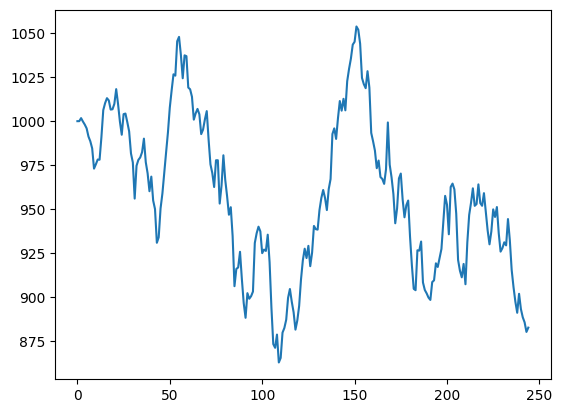

In [50]:
## New trading strategy
initial_money = 1000
available_money = initial_money
stocks_owned = 0
previous_day_price = stock_test_data_chron['Daily_Mean_Price'][p-1]
capital_history = [initial_money]
n =10;
for predicted_price, actual_price in zip(y_pred_AR, stock_test_data_chron['Daily_Mean_Price'][p:]):
  if predicted_price > previous_day_price:
    # Buy stocks
    stocks_owned += (available_money/n) / previous_day_price
    available_money = available_money*(n-1)/n
  elif predicted_price < previous_day_price:
    # Sell stocks
    available_money += (stocks_owned/n) * previous_day_price
    stocks_owned = stocks_owned*(n-1)/n
  capital_history.append(available_money + stocks_owned*previous_day_price)
  previous_day_price = actual_price # Update the previous day's price for the next iteration

print(capital_history[-1])
plt.plot(capital_history)

1 : 1047.2879052435726


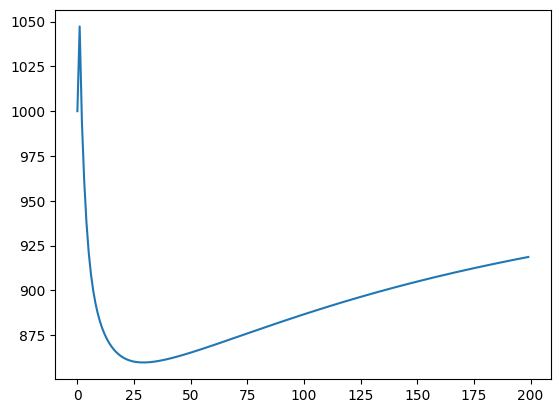

In [54]:
## What would be the best n?
final_capital_history = [1000]
for n in range(1, 200):
  initial_money = 1000
  available_money = initial_money
  stocks_owned = 0
  previous_day_price = stock_test_data_chron['Daily_Mean_Price'][p-1]

  capital_history = [initial_money]
  for predicted_price, actual_price in zip(y_pred_AR, stock_test_data_chron['Daily_Mean_Price'][p:]):
    if predicted_price > previous_day_price:
      # Buy stocks with half of the available money at the actual price of the previous day
      stocks_owned += (available_money/n) / previous_day_price
      available_money = available_money*(n-1)/n # All money is used to buy stocks
    elif predicted_price < previous_day_price:
      # Sell half stocks at the actual price of the previous day
      available_money += (stocks_owned/n) * previous_day_price
      stocks_owned = stocks_owned*(n-1)/n # All stocks are sold
    capital_history.append(available_money + stocks_owned*previous_day_price)
    previous_day_price = actual_price # Update the previous day's price for the next iteration
  final_capital_history.append(capital_history[-1])

max_capital = max(final_capital_history)
print(final_capital_history.index(max_capital), ":", max_capital)
plt.plot(final_capital_history)